## AMES HOUSING DATA - PREDICTIVE ANALYSIS

Based on the preprocessed/prepared data(cleaned from missing values and outliers), the next step is towards data modeling where we're going to implement several ML Algorithms/model available through ***Scikit-Learn*** library. 

**Objective**

* Fitting the prepared data within regression model
* Implementing techniques like Cross-Validation, Regularization, Scaling/Normalization or changing hyperparamaters
* The main aim is to progress with best possible performance metrics, that is, evaluated and compared through errors/scores that we're going to obtain through multiple approaches.
* Since, we have derived several continuous columns through categorical columns (through feature engineering) -- The aim is to identify necessary features that are most valuable in predicting house prices. (I'll be using ***Lasso Regression*** Model for the same)

#### PART 1: DATA LOADING

In [4]:
# importing useful libraries

In [5]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("Ames_Final_DF.csv")

In [7]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False


In [8]:
#making X and y from dataframe
X = df.drop("SalePrice", axis = 1)
y = df['SalePrice']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 273 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(238), float64(11), int64(24)
memory usage: 1.4 MB


There are 273 features in our independent variables set. All of these will be not useful to predict our dependent variable (SalePrice). We can confirm most crucial features from Lasso Regression

#### PART 2: DATA SPLITTING (TRAIN | TEST), SCALING & MODELING

**Steps to follow**

* Split
* Scale
* Model
* Retrain/Evaluate

In [13]:
#Splitting Train | Test data sets
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [15]:
#Scaling the X features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#implementing LassoCV Regression
from sklearn.linear_model import LassoCV

In [17]:
model_ls = LassoCV(
    n_alphas = 100,
    max_iter = 1000000,
    eps = 0.001,
    cv = 10
)

In [18]:
model_ls.fit(X_train, y_train)

LassoCV(cv=10, max_iter=1000000)

In [19]:
model_ls.alpha_

257.7945496809009

In [20]:
model_ls.intercept_

181399.4793261868

In [21]:
coef_array = model_ls.coef_

In [22]:
col_array = X.columns

In [23]:
col_coef = pd.DataFrame(data = [coef_array, col_array]).T
col_coef.columns = ['coefficient', 'columns']

In [24]:
del_columns = list(col_coef[col_coef['coefficient'] == 0]['columns'])
del_columns

['Bsmt Unf SF',
 '1st Flr SF',
 'Garage Yr Blt',
 '3Ssn Porch',
 'Misc Val',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS SubClass_40',
 'MS SubClass_50',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'Lot Shape_IR3',
 'Land Contour_Lvl',
 'Lot Config_FR2',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_IDOTRR',
 'Neighborhood_Landmrk',
 'Neighborhood_MeadowV',
 'Neighborhood_SawyerW',
 'Condition 1_Feedr',
 'Condition 2_Norm',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'House Style_1.5Unf',
 'House Style_1Story',
 'House Style_2.5Unf',
 'House Style_2Story',
 'House Style_SFoyer',
 'House Style_SLvl',
 'Roof Style_Gable',
 'Roof Style_Gambrel',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Roof Matl_Tar&Grv',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkComm',
 'Exterior 1st_CBlock',
 'Exterior 1st_VinylSd',
 'Exterior 1st_WdShing',
 'Exterior 2nd_Brk Cmn',
 'Exterior 2nd_CBlock',
 'Exterio

Above is the list of columns that are ignored by LassoCV (if the coefficient values of columns are zero, that means Regression model doesn't consider those features) -- Therefore, these are not necessarily important features to predict house prices.

**Conclusion**

* It comes with certain trade-off to decide whether to remove these features or not.
  * Since, we have a large dataset of 274 columns, it would be great if we can lower it down to some extent, let's say we remove these 99 features.
  * Moreover, it can also happen that we must get somewhat marginal higher error points as well. (After removing columns, we can try models other than lassoCV and can see the difference of error)

To summarize, let's find the error margin from this trained model. In the next step, I will remove these features from original dataset and apply other regression models to check and evaluate.

In [26]:
#importing error metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_test_pred = model_ls.predict(X_test)
print("RMSE is:", round(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("MAE is:", round(mean_absolute_error(y_test, y_test_pred)))

RMSE is: 21431
MAE is: 14414


From LassoCV Regression, the resulted performance is off by ***$14414*** MAE (the average predicted price would be off by this margin)

In [28]:
#removing the untilized columns from the original dataframe to create a new one
Imp_dataframe = df.drop(del_columns, axis = 1)

In [29]:
Imp_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 175 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(144), float64(9), int64(22)
memory usage: 1.1 MB


#### Working with new dataframe with 175 columns

In [31]:
#converting X and y from new dataframe
X = Imp_dataframe.drop('SalePrice', axis = 1)
y = Imp_dataframe['SalePrice']

In [32]:
#left columns
len(X.columns)

174

In [33]:
#splitting the dataset into train | test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)

In [34]:
#scaling X features
new_scale = StandardScaler()
X_train = new_scale.fit_transform(X_train)
X_test = new_scale.transform(X_test)

**Let's start with basic linear regression model that uses no alpha values or cross validations**

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model_lr = LinearRegression()

In [38]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [39]:
y_test_pred = model_lr.predict(X_test)

In [40]:
print("RMSE is:", round(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("MAE is:", round(mean_absolute_error(y_test, y_test_pred)))

RMSE is: 21257
MAE is: 14483


Not a significant different, as MAE = 14483, although we got a better RMSE value

**Improving the process of regression through cross validations for more transparent effects on test set. Since, we have options for manual validations, cross_val_score, or cross_validate, but preferably GridSearchCV does the best possible work for opting best alpha values and CVs**

In [43]:
from sklearn.linear_model import RidgeCV

In [44]:
base_model_rg = RidgeCV()

In [45]:
#creating a dictionary for parameter grid to be passed in GridSearchCV
param_grid = {'alphas':[100, 200, 253, 254, 255, 256, 257.79, 260, 280, 300, 320, 360, 400, 450, 480]}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
grid_model = GridSearchCV(
    estimator = base_model_rg,
    param_grid = param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose = 2
)

In [48]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END .........................................alphas=100; total time=   0.0s
[CV] END .........................................alphas=100; total time=   0.0s
[CV] END .........................................alphas=100; total time=   0.0s
[CV] END .........................................alphas=100; total time=   0.0s
[CV] END .........................................alphas=100; total time=   0.0s
[CV] END .........................................alphas=200; total time=   0.0s
[CV] END .........................................alphas=200; total time=   0.0s
[CV] END .........................................alphas=200; total time=   0.0s
[CV] END .........................................alphas=200; total time=   0.0s
[CV] END .........................................alphas=200; total time=   0.0s
[CV] END .........................................alphas=253; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=RidgeCV(),
             param_grid={'alphas': [100, 200, 253, 254, 255, 256, 257.79, 260,
                                    280, 300, 320, 360, 400, 450, 480]},
             scoring='neg_mean_squared_error', verbose=2)

In [49]:
grid_model.best_params_

{'alphas': 100}

In [50]:
y_test_pred = grid_model.predict(X_test)

In [51]:
print("RMSE is:", round(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("MAE is:", round(mean_absolute_error(y_test, y_test_pred)))

RMSE is: 21842
MAE is: 14770


Let's compare the performance metrices from all three approaches:

| LassoCV(with all features) | Linear Regression(with necessary features) | RidgeCV with GridSearch (with necessary features) |
| ---------------------------|--------------------------------------------|---------------------------------------------------|
|            MAE             |                   MAE                      |                       MAE                         |
|           14414            |                  14483                     |                      15002                        |

#### NOTE: Using RidgeCV with GridSearch picked alpha value of 200, while LassoCV had picked an alpha value of 257.79

Let's use ElasticNet with GridSearchCV

**OBJECTIVE**
* This will finally test that which one is the best regression model: 'Ridge or Lasso' for the new dataframe. (Through L1_ratio parameter)
* Able to analyze the best possible alpha values

In [55]:
from sklearn.linear_model import ElasticNet

In [56]:
base_elastic_model = ElasticNet(max_iter=1000000)

In [57]:
param_grid = { 'alpha' : [100, 200, 253, 254, 255, 256, 257.79, 260, 280, 300, 320, 360, 400, 450, 480],
    'l1_ratio' : [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

In [58]:
grid_model = GridSearchCV(
    estimator = base_elastic_model,
    param_grid = param_grid,
    scoring='neg_mean_squared_error',
    cv=25,
    verbose = 0
)

In [59]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=25, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [100, 200, 253, 254, 255, 256, 257.79, 260,
                                   280, 300, 320, 360, 400, 450, 480],
                         'l1_ratio': [0.1, 0.2, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error')

In [60]:
#let's check different attributes based on trained grid model
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [61]:
y_test_pred = grid_model.predict(X_test)
print("RMSE is:", round(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("MAE is:", round(mean_absolute_error(y_test, y_test_pred)))

RMSE is: 21211
MAE is: 14382


#### Conclusion
Alpha is still different, although ElasticNet choosed Lasso Regression completely (L1_ratio = 1) 

* This can be something noticeable, although the best fit model for the dataset is **LassoCV** (whether to choose it with full dataset or with the new dataframe)
* Another thing to notice is the individual performance of **LassoCV**, rather then getting opted through ElasticNet + GridSearchCV regression model. The best model fit will be the one that has been trained and modelled through **LassoCV** individually. 

----

#### OPTIONAL
Retrain model based on LassoCV regression individually using the new dataframe of 175 columns. (with same hyperparameters)

There was a slight considerable change happened through this process as follows:

In [65]:
model_new_ls = LassoCV(
    n_alphas = 100,
    max_iter = 1000000,
    eps = 0.001,
    cv = 10
)

In [66]:
model_new_ls.fit(X_train, y_train)

LassoCV(cv=10, max_iter=1000000)

In [67]:
y_test_pred = model_new_ls.predict(X_test)
print("RMSE is:", round(np.sqrt(mean_squared_error(y_test, y_test_pred))))
print("MAE is:", round(mean_absolute_error(y_test, y_test_pred)))

RMSE is: 21213
MAE is: 14404


In [68]:
model_new_ls.alpha_
#getting new alpha value

63.85767837180903

In [69]:
obs = model_new_ls.coef_
col_array = X.columns
new_obs = pd.DataFrame(data = [obs, col_array]).T
new_obs.columns = ['coefficient', 'columns']
new_obs

,coefficient,columns
0,1672.465221,Lot Frontage
1,4479.959398,Lot Area
2,9559.93825,Overall Qual
3,6136.190088,Overall Cond
4,10363.190841,Year Built
...,...,...
169,-681.514236,Sale Type_Oth
170,979.401207,Sale Condition_AdjLand
171,728.73888,Sale Condition_Alloca
172,3047.873171,Sale Condition_Normal


In [70]:
del_col = list(new_obs[new_obs['coefficient'] == 0]['columns'])
del_col
#still finding some columns w.r.t their current comparison within 175 columns, that aren't considered for the price prediction

['Low Qual Fin SF',
 'Roof Style_Hip',
 'Exterior 1st_HdBoard',
 'Exterior 1st_Wd Sdng',
 'Mas Vnr Type_BrkFace']

In [71]:
new_df = Imp_dataframe.drop(del_col, axis = 1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 170 entries, Lot Frontage to Sale Condition_Partial
dtypes: bool(140), float64(9), int64(21)
memory usage: 1.1 MB


----

It is an iterative process to go through Lasso Regression for every new dataframe formed after deleting certain columns. We can see minor adjustments in MAE (lower side) through this process but that doesn't give any significant difference (untill it is not required to be strict enough) 

----

### Retraining Model on Full Data
* Considering Imp_Dataframe(with 175 columns) to be our final dataframe with X as full features and y as full predictions. 
* model_new_ls will be the final model to be trained.

**OBJECTIVE**

Through this exercise, we'll be able to plot **ACTUAL SALE PRICE** w.r.t **PREDICTED SALE PRICE** to ensure the different between the same.

In [149]:
model_new_ls.fit(X, y)

LassoCV(cv=10, max_iter=1000000)

In [151]:
y_predictions = model_new_ls.predict(X)

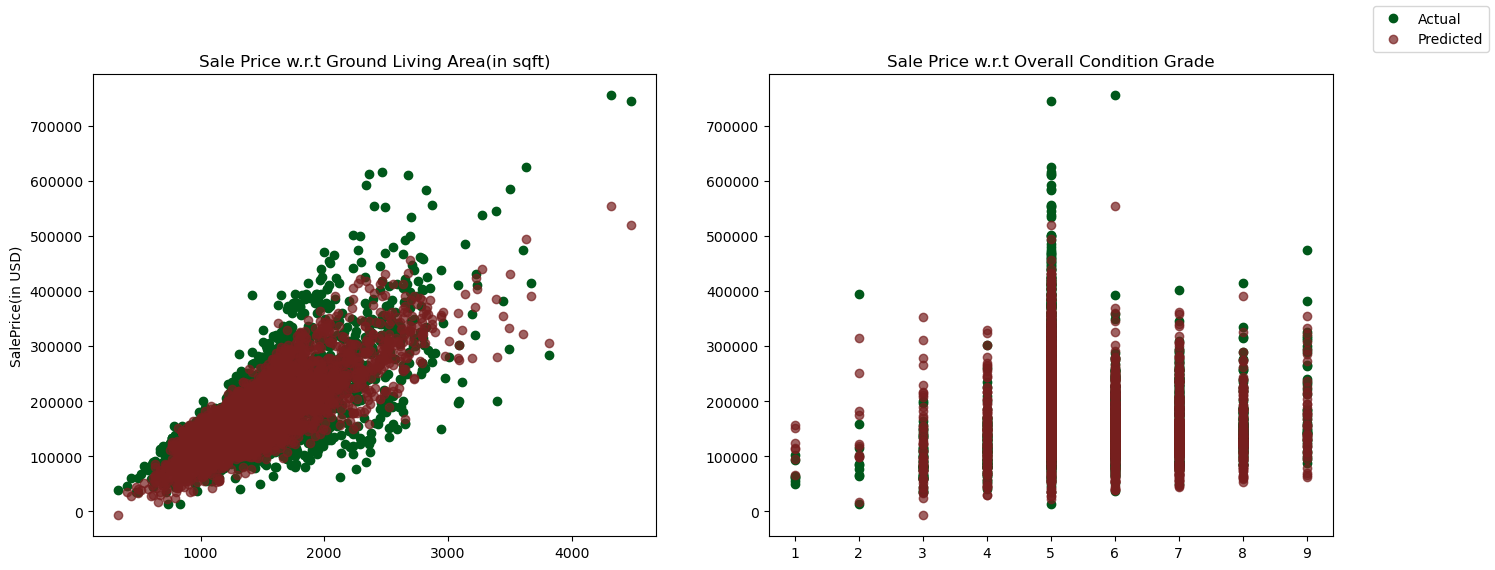

In [189]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,6))

axes[0].plot(Imp_dataframe['Gr Liv Area'],Imp_dataframe['SalePrice'],'o', color = '#00581A', label='Actual')
axes[0].plot(Imp_dataframe['Gr Liv Area'],y_predictions,'o',color='#771F1F', alpha = 0.7, label='Predicted')
fig.legend()
axes[0].set_ylabel("SalePrice(in USD)")
axes[0].set_title("Sale Price w.r.t Ground Living Area(in sqft)")

axes[1].plot(Imp_dataframe['Overall Cond'],Imp_dataframe['SalePrice'],'o', color = '#00581A')
axes[1].plot(Imp_dataframe['Overall Cond'],y_predictions,'o',color='#771F1F', alpha = 0.7)
axes[1].set_title("Sale Price w.r.t Overall Condition Grade");



### Author
[Sourav Syal](https://www.linkedin.com/in/sourav-syal/)